In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [21]:
# Carica il dataset
df = pd.read_csv("copertura-vaccinale.csv", sep=",")

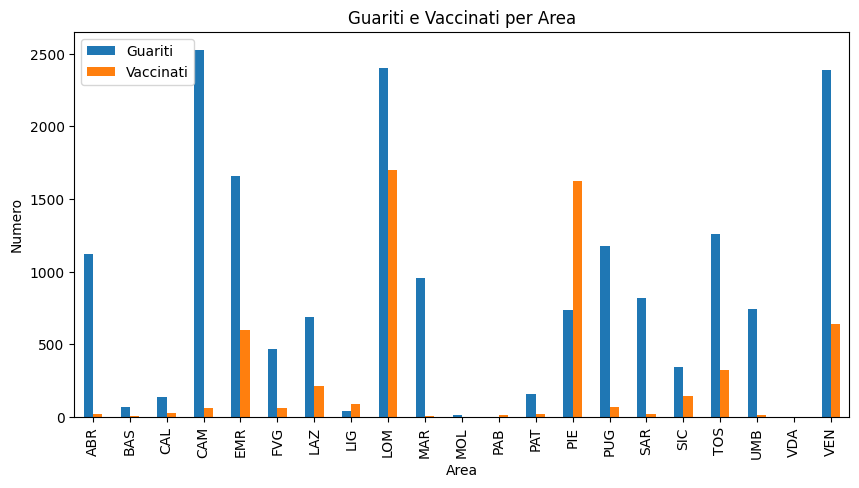

In [22]:
# Raggruppa per 'area' e somma guariti e vaccinati
df_grouped = df.groupby("area")[["guariti", "vaccinati"]].sum()

# Plot dei dati
df_grouped.plot(kind="bar", figsize=(10, 5))
plt.xlabel("Area")
plt.ylabel("Numero")
plt.title("Guariti e Vaccinati per Area")
plt.legend(["Guariti", "Vaccinati"])
plt.xticks(rotation=90)
plt.show()

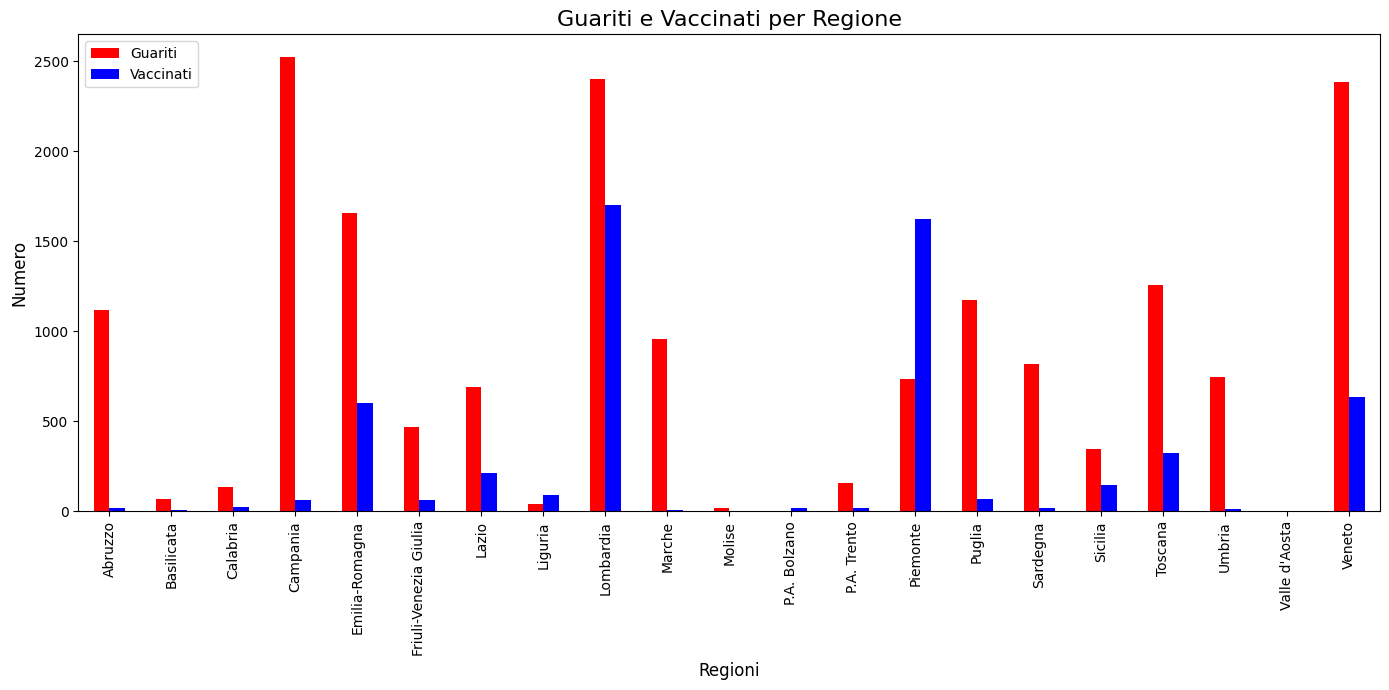

In [25]:


# Raggruppamento dei dati per regione e somma dei guariti e vaccinati
region_grouped = df.groupby('nome_area')[['guariti', 'vaccinati']].sum()

# Creazione del grafico
region_grouped.plot(kind='bar', figsize=(14, 7), color=['red', 'blue'])

# Etichettatura e titolo
plt.title('Guariti e Vaccinati per Regione', fontsize=16)
plt.xlabel('Regioni', fontsize=12)
plt.ylabel('Numero', fontsize=12)
plt.xticks(rotation=90)
plt.legend(['Guariti', 'Vaccinati'])
plt.tight_layout()

# Visualizzazione del grafico
plt.show()


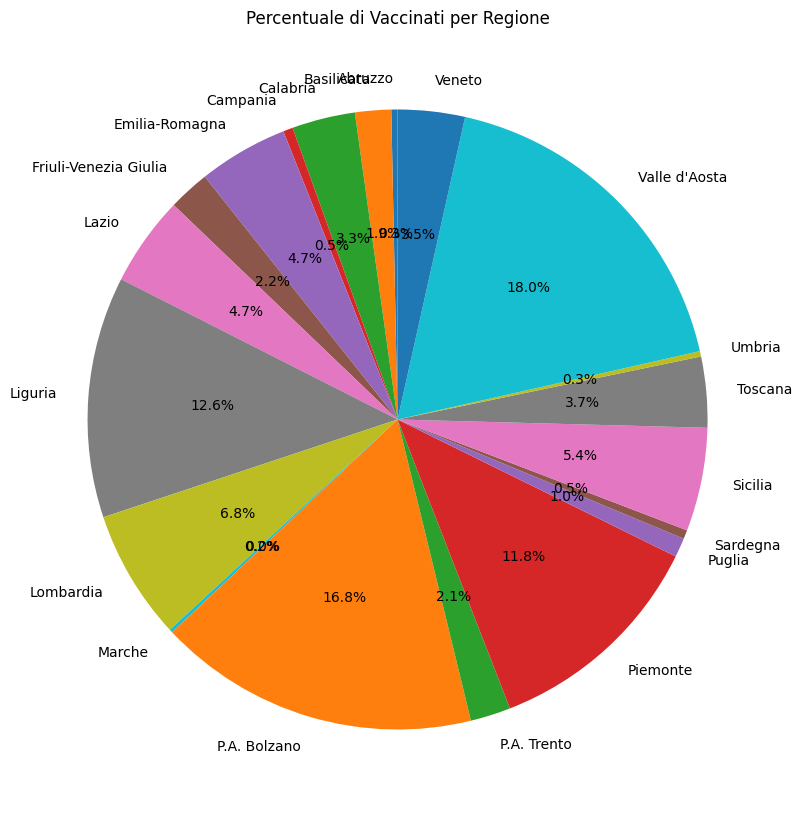

In [31]:
# Calcolare la percentuale di vaccinati rispetto ai guariti per ogni regione
df['percent_vaccinati'] = df['vaccinati'] / (df['vaccinati'] + df['guariti']) * 100
df_pivot = df.groupby('nome_area')['percent_vaccinati'].mean()
df_pivot.plot(kind='pie', figsize=(10, 12), autopct='%1.1f%%', startangle=90)
plt.title('Percentuale di Vaccinati per Regione')
plt.ylabel('')
plt.show()




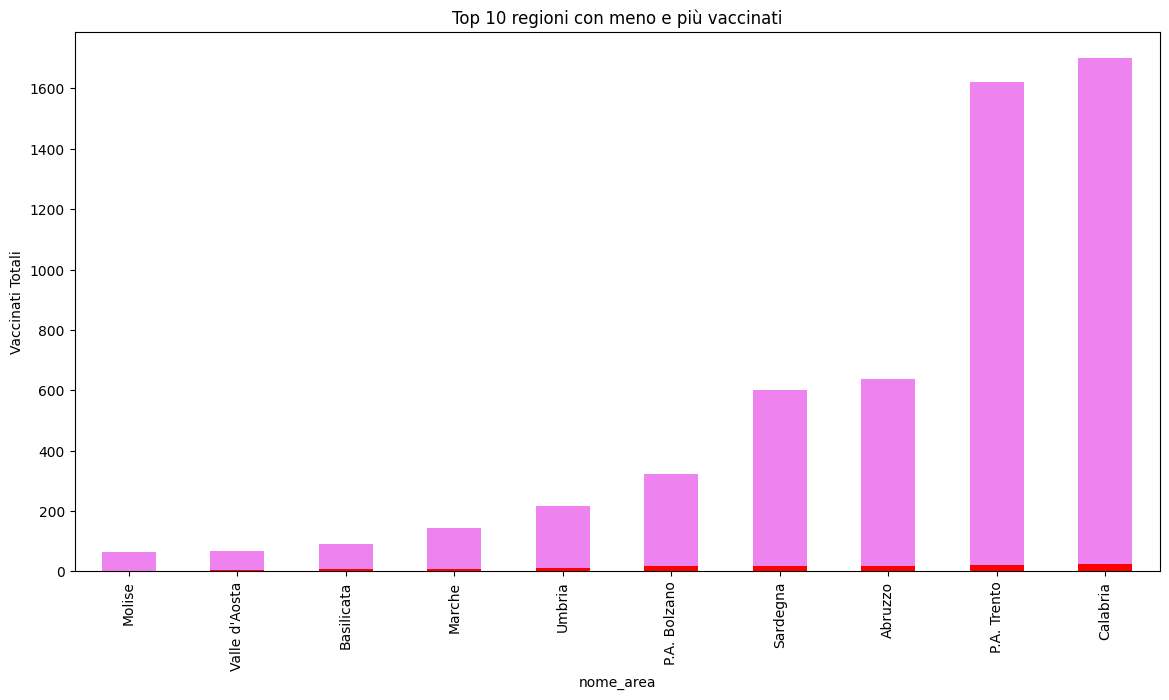

In [36]:
region_vaccinati = df.groupby('nome_area')['vaccinati'].sum().sort_values()
region_vaccinati[-10:].plot(kind='bar', color='violet', figsize=(12, 6))
region_vaccinati[:10].plot(kind='bar', color='red', figsize=(14, 7))
plt.title('Top 10 regioni con meno e più vaccinati')
plt.ylabel('Vaccinati Totali')
plt.show()


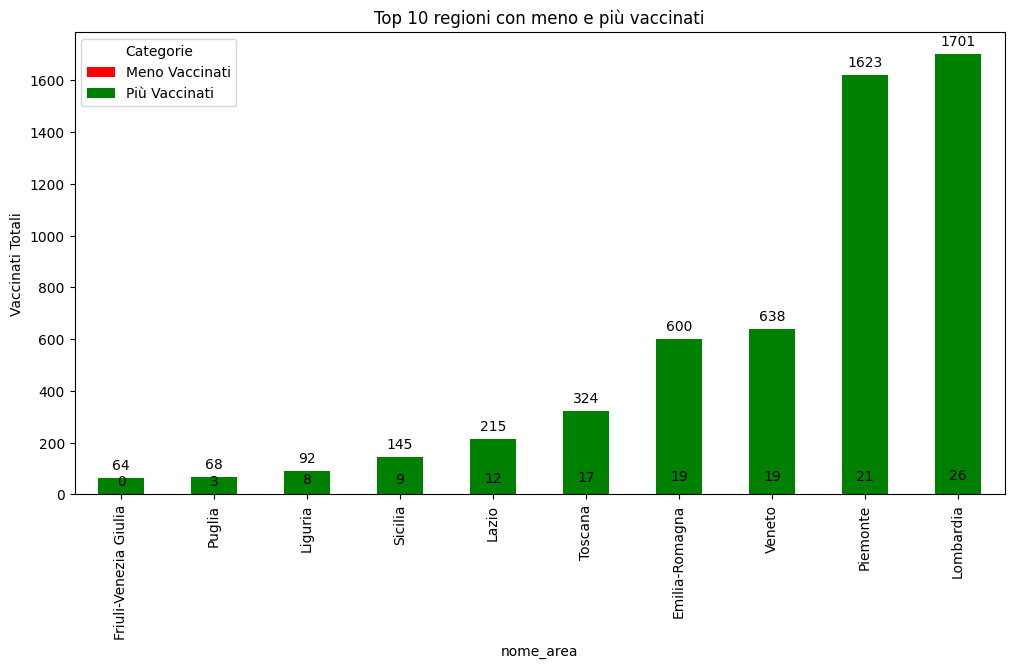

In [40]:
import matplotlib.pyplot as plt

# Raggruppa i dati
region_vaccinati = df.groupby('nome_area')['vaccinati'].sum().sort_values()

# Crea il grafico per le prime 10 regioni con meno vaccinati
ax = region_vaccinati[:10].plot(kind='bar', color='red', figsize=(12, 6), label='Meno Vaccinati')

# Aggiungi il grafico per le ultime 10 regioni con più vaccinati
region_vaccinati[-10:].plot(kind='bar', color='green', ax=ax, label='Più Vaccinati')

# Aggiungi il titolo e l'etichetta dell'asse
plt.title('Top 10 regioni con meno e più vaccinati')
plt.ylabel('Vaccinati Totali')

# Aggiungi la legenda
plt.legend(title='Categorie', loc='upper left')

# Aggiungi i valori sopra ogni barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 9), 
                textcoords='offset points', 
                ha='center', va='center')

# Mostra il grafico
plt.show()

